In [1]:
%matplotlib inline

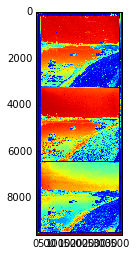

In [70]:
from skimage import io
from scipy import fftpack
import numpy as np
import matplotlib.pyplot as plt
image = io.imread('00029u.png')
plt.imshow(image)

In [71]:
import matplotlib.pyplot as plt 
from PIL import Image, ImageDraw 
import numpy as np 
import math 
from scipy import ndimage 
from scipy.misc import imresize 
#LOAD IMAGES 
img = Image.open("00029u.png") 
#WARNING SIZE AND SHAPE INDICES ARE UPSIDE DOWN  
size1_size=int(round(img.size[1]/10)) 
size2_size=int(round(img.size[0]/10)) 
img = imresize(img, ( size1_size,size2_size),interp
='bilinear').astype('float') 
img_np = np.array(img) 
x1 = 20; y1 = 20; 
x2 = 25; y2 = 333; 
x3 = 24; y3 = 647; 
w = 336; h = 302; 
im1 = img_np[y1-2:y1+h-2,x1-1:x1+w-1]; 
im2 = img_np[y2-2:y2+h-2,x2-1:x2+w-1]; 
im3 = img_np[y3-2:y3+h-2,x3-1:x3+w-1]; 
I1 = 256*im1.astype('double')/im1.max(); 
I2 = 256*im2.astype('double')/im2.max(); 
I3 = 256*im3.astype('double')/im3.max(); 
RGB=np.zeros([h,w,3],dtype=type(img_np[0,0]))  
RGB[:,:,0]=I3 
RGB[:,:,1]=I2 
RGB[:,:,2]=I1

RGB[:,:,0] = ((RGB[:,:,0] - RGB[:,:,0].min()) / (RGB[:,:,0].max() - RGB[:,:,0].min()))
RGB[:,:,1] = ((RGB[:,:,1] - RGB[:,:,1].min()) / (RGB[:,:,1].max() - RGB[:,:,1].min()))
RGB[:,:,2] = ((RGB[:,:,2] - RGB[:,:,2].min()) / (RGB[:,:,2].max() - RGB[:,:,2].min()))

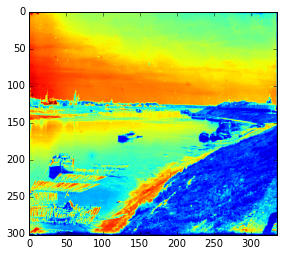

In [72]:
plt.imshow(RGB[:,:,0])

In [73]:
def extreurebarquet(image,bloc, zona):
    centreX=140
    centreY=165
    xmin=centreX-bloc
    xmax=centreX+bloc
    ymin=centreY-bloc
    ymax=centreY+bloc
    barquetR=RGB[ymin:ymax,xmin:xmax,0]
    barquetG=RGB[ymin:ymax,xmin:xmax,1]
    barquetB=RGB[ymin:ymax,xmin:xmax,2]
    barquetR = ((barquetR - barquetR.min()) / (barquetR.max() - barquetR.min()))-np.mean(barquetR)
    barquetG = ((barquetG - barquetG.min()) / (barquetG.max() - barquetG.min()))-np.mean(barquetG)
    barquetB = ((barquetB - barquetB.min()) / (barquetB.max() - barquetB.min()))-np.mean(barquetB)
    return barquetR,barquetG,barquetB

<type 'numpy.ndarray'>


<matplotlib.colorbar.Colorbar instance at 0x7f2a160557a0>

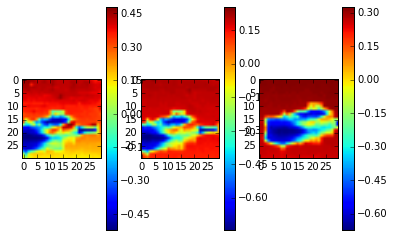

In [74]:
print type(RGB/255.)
barquetR,barquetG,barquetB=extreurebarquet(RGB,15,3)
plt.subplot(1,3,1)
plt.imshow(barquetR)
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(barquetG)
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(barquetB)
plt.colorbar()


In [75]:
from scipy import signal
from scipy import misc
NCCBR=signal.correlate2d(barquetB.astype('float'), barquetR.astype('float'), mode='full', boundary='fill', fillvalue=0)
NCCBG=signal.correlate2d(barquetB.astype('float'), barquetG.astype('float'), mode='full', boundary='fill', fillvalue=0)

65.013624026540271

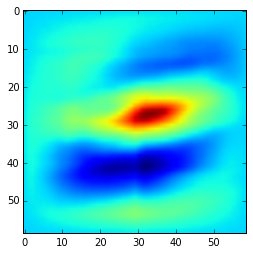

In [76]:
plt.imshow(NCCBR)
NCCBR.max()

67.516386304464305

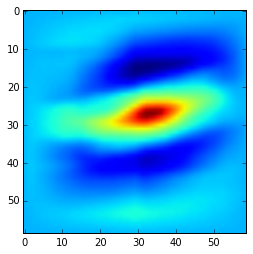

In [77]:
plt.imshow(NCCBG)
NCCBG.max()

In [78]:
np.argmax(NCCBR)

1626

In [79]:
def posmax(NCC1):
    np.argmax(NCC1)
    #punt maxim de la correlacio
    maxposiciony=np.argmax(NCC1)/59
    maxposicionx=maxposiciony*59
    maxposicionx=np.argmax(NCC1)-maxposicionx
    print "pos max y",  maxposiciony
    print "pos max x", maxposicionx
    posicionx=30-maxposiciony
    posiciony=30-maxposicionx
    print "desplaçament y",  posiciony
    print "desplaçament x", posicionx
    return posicionx,posiciony

pos max y 27
pos max x 33
desplaçament y -3
desplaçament x 3
pos max y 27
pos max x 33
desplaçament y -3
desplaçament x 3


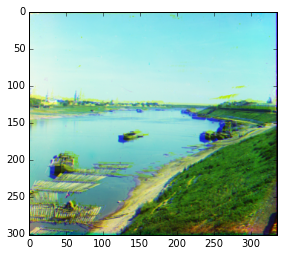

In [80]:
posicionxBR,posicionyBR=posmax(NCCBR)
posicionxBG,posicionyBG=posmax(NCCBG)
plt.imshow(RGB)

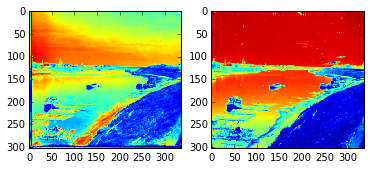

In [81]:
def moureimatge(x,y,imatge):
    imatge2=np.roll(imatge,y, axis=0)
    imatge2=np.roll(imatge2,x)
    plt.subplot(1,2,1)
    plt.imshow(imatge2)
    return imatge2
    
RGB[:,:,0]=moureimatge(6,posicionyBR,RGB[:,:,0])
plt.subplot(1,2,2)
plt.imshow(RGB[:,:,2])


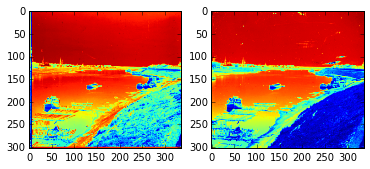

In [82]:
RGB[:,:,1]=moureimatge(6,posicionyBG,RGB[:,:,1])
plt.subplot(1,2,2)
plt.imshow(RGB[:,:,2])

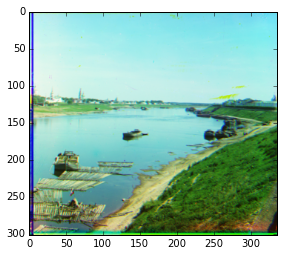

In [83]:
plt.imshow(RGB)

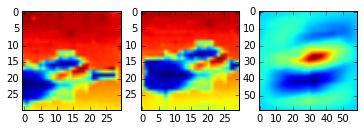

In [84]:
barquetR2,barquetG2,barquetB2=extreurebarquet(RGB,15,3)
plt.subplot(1,3,1)
plt.imshow(barquetR)
plt.subplot(1,3,2)
plt.imshow(barquetR2)
plt.subplot(1,3,3)
plt.imshow(NCCBR)


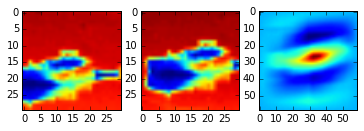

In [85]:
plt.subplot(2,3,1)
plt.imshow(barquetG)
plt.subplot(2,3,2)
plt.imshow(barquetG2)
plt.subplot(2,3,3)
plt.imshow(NCCBG)

NameError: name 'NCC' is not defined

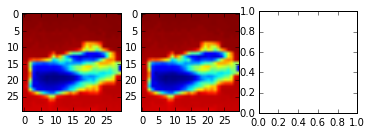

In [86]:
plt.subplot(2,3,1)
plt.imshow(barquetB)
plt.subplot(2,3,2)
plt.imshow(barquetB2)
plt.subplot(2,3,3)
plt.imshow(NCC)